In [1]:
## MODELO DE APRENDIZADO SEM O NÚMERO DO INCRA
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle 


In [2]:
# Carrega o conjunto de dados para aprendizado
cj_aprend = pd.read_pickle('..//DADOS//v2_cj_aprend.pickle')

cj_aprend

,cnir.codigoCnir,ditr2020.nirf,ditr2020.codigoIncra,class,ig.ni,ig.codigoIncra,ig.municipio,dif
0,461126,15955257,0010900016277,True,True,True,True,0
1,490266,40738868,0012280119839,True,True,True,True,0
2,462245,41931661,0010901351940,True,True,True,True,0
3,482468,33902925,NAO INFORMADO,True,True,False,True,52
4,482556,42001382,0011710137651,True,True,True,True,0
...,...,...,...,...,...,...,...,...
5747787,4305391,46600329,9501730460270,False,False,False,False,70
5747791,4284287,10400753,9500178038988,False,False,False,False,99
5747792,4330168,26409666,8150980261744,False,False,False,False,99
5747794,90583,40483720,0000272882509,False,False,False,False,97


In [3]:
# Mais uma faxina:
cj_aprend['ditr2020.codigoIncra'] = cj_aprend['ditr2020.codigoIncra'].apply(lambda x: 0 if x=='NAO INFORMADO' else x)

# O código CNIR e o NIRF não tem interesse no aprendizado
del cj_aprend['cnir.codigoCnir']
del cj_aprend['ditr2020.nirf']

# Versão de aprendizado sem o número do INCRA.
del cj_aprend['ig.codigoIncra']
del cj_aprend['ditr2020.codigoIncra']

cj_aprend

,class,ig.ni,ig.municipio,dif
0,True,True,True,0
1,True,True,True,0
2,True,True,True,0
3,True,True,True,52
4,True,True,True,0
...,...,...,...,...
5747787,False,False,False,70
5747791,False,False,False,99
5747792,False,False,False,99
5747794,False,False,False,97


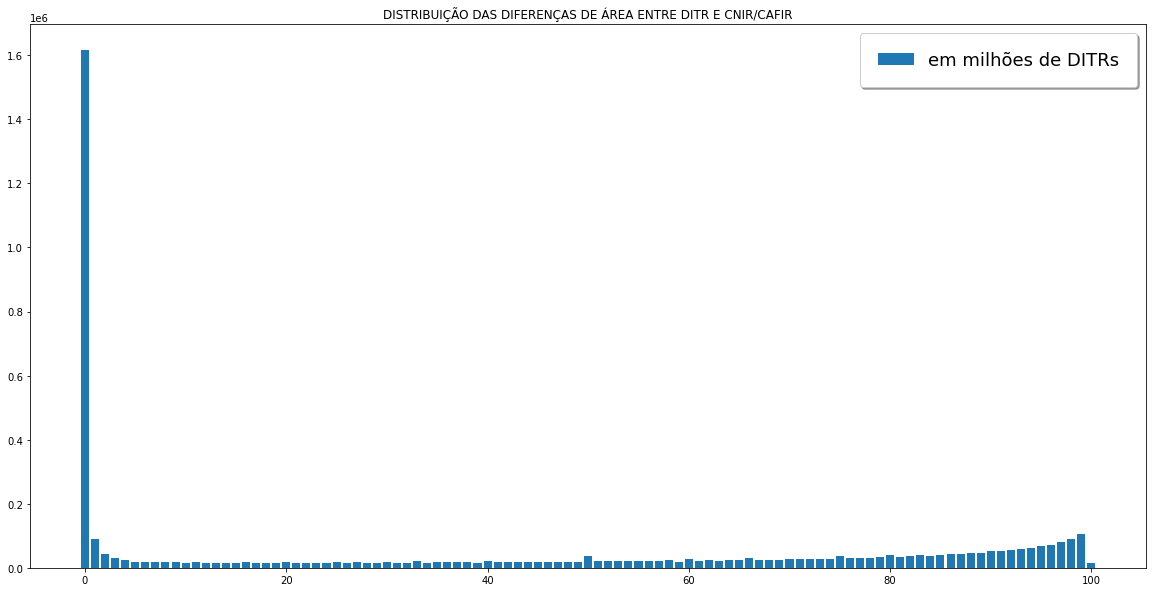

In [4]:
## Distribuição das diferenças entre tamanho das áreas declarado(DITR) e cadastrado(CAFIR/CNIR)
cj_dif = pd.DataFrame()
cj_dif['qtd'] = cj_aprend['dif'].value_counts()
cj_dif['pc_dif'] = cj_dif.index

plt.figure(figsize=(20, 10))
plt.bar(cj_dif['pc_dif'], cj_dif['qtd'])
plt.title('DISTRIBUIÇÃO DAS DIFERENÇAS DE ÁREA ENTRE DITR E CNIR/CAFIR')
plt.legend(['em milhões de DITRs'], fancybox=True, framealpha=1, shadow=True, borderpad=1,  fontsize=18)

       qtd  pc_dif
0  1616061       0
1    89877       1
2    42038       2
3    30549       3


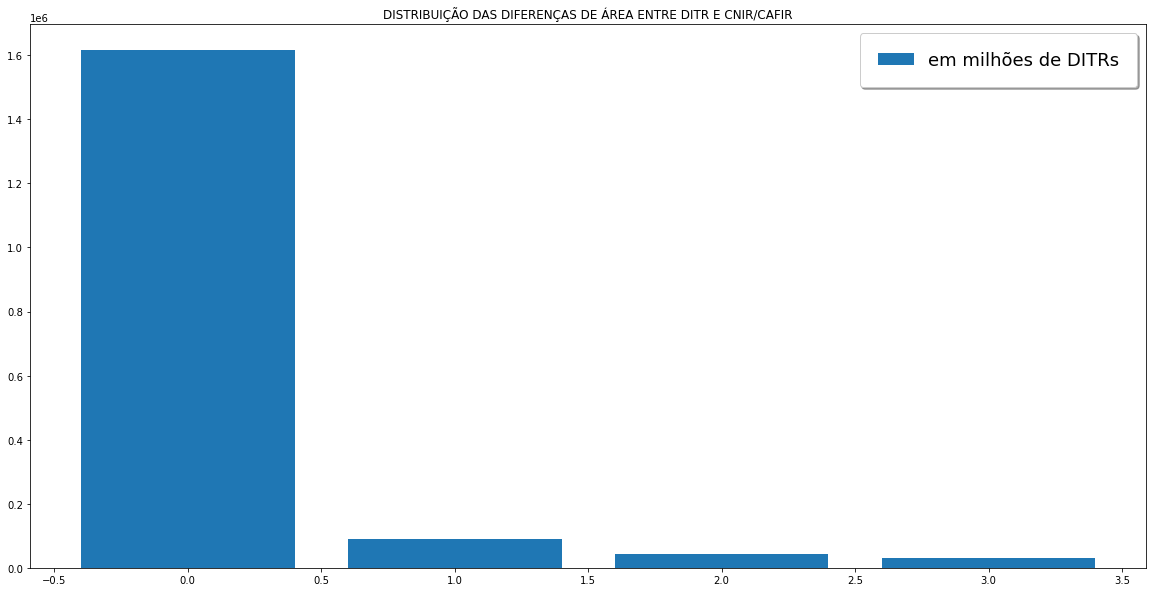

In [7]:
## Para melhorar a acurácia, vamos reduzir a quantidade de classes eliminando diferenças superiores a 3%
cj_dif_3pc = cj_dif[cj_dif['pc_dif']<=3]
print(cj_dif_3pc)

plt.figure(figsize=(20, 10))
plt.bar(cj_dif_3pc['pc_dif'], cj_dif_3pc['qtd'])
plt.title('DISTRIBUIÇÃO DAS DIFERENÇAS DE ÁREA ENTRE DITR E CNIR/CAFIR')
plt.legend(['em milhões de DITRs'], fancybox=True, framealpha=1, shadow=True, borderpad=1,  fontsize=18)

In [8]:
## Iniciando o aprendizado

# Criando a coluna de resultado.
cj_resultado = cj_aprend['class']
del cj_aprend['class']
print(cj_resultado)
print(cj_aprend)

0           True
1           True
2           True
3           True
4           True
           ...  
5747787    False
5747791    False
5747792    False
5747794    False
5747796    False
Name: class, Length: 4454349, dtype: bool
         ig.ni  ig.municipio  dif
0         True          True    0
1         True          True    0
2         True          True    0
3         True          True   52
4         True          True    0
...        ...           ...  ...
5747787  False         False   70
5747791  False         False   99
5747792  False         False   99
5747794  False         False   97
5747796  False         False   99

[4454349 rows x 3 columns]


In [9]:
scj_aprend, scj_teste, resultado_aprend, resultado_teste = train_test_split(cj_aprend, cj_resultado, random_state=0)
print(scj_aprend.shape)
print(scj_teste.shape)

(3340761, 3)
(1113588, 3)


In [10]:
## Aprendendo com o algoritmo o algoritmo K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(scj_aprend, resultado_aprend)


KNeighborsClassifier(n_neighbors=1)

In [11]:
placar = knn.score(scj_teste, resultado_teste)


In [11]:
# Carrega o conjunto de dados para aplicação do modelo
cj_aplic = pd.read_pickle('..//DADOS//v2_cj_aplic.pkl')
cj_aplic

,cnir.codigoCnir,cnir.codigoIncra,ditr2020.nirf,ditr2020.codigoIncra,ig.ni,ig.codigoIncra,ig.municipio,dif
0,445583,0010400846389,35492953,NAO INFORMADO,True,False,True,0
1,6580046,9510211621240,35492953,NAO INFORMADO,True,False,True,0
2,482431,0011710106004,29529999,0011710106004,True,True,False,0
3,482431,0011710106004,02520214,0010901252373,True,False,False,4
4,482431,0011710106004,07620985,6221250070487,True,False,False,84
...,...,...,...,...,...,...,...,...
3757449,190583,0000352345164,15931757,NAO INFORMADO,True,False,True,0
3757450,6624185,9510301874619,10904930,9510301874619,True,True,True,0
3757451,4962800,9500680979427,49954113,NAO INFORMADO,True,False,False,0
3757452,5234043,9500926390797,74797433,NAO INFORMADO,True,False,True,55


In [13]:
# Separando as legendas dos dados
cj_dados_aplic = cj_aplic[['ig.ni','ig.municipio','dif' ]]
cj_dados_aplic

,ig.ni,ig.municipio,dif
0,True,True,0
1,True,True,0
2,True,False,0
3,True,False,4
4,True,False,84
...,...,...,...
3757449,True,True,0
3757450,True,True,0
3757451,True,False,0
3757452,True,True,55


In [14]:
## Classificando os resultados usando a base de produção
resultado_classificacao = knn.predict(cj_dados_aplic)


In [39]:

print('Registros totais: ', len(resultado_classificacao))
encontrado = 0
for x in resultado_classificacao:
    if(x):
        encontrado += 1
print('Registros correspondentes: ', encontrado)
print('Registros não correspondentes: ', len(resultado_classificacao) - encontrado)


Registros totais:  3757454
Registros correspondentes:  3519947
Registros não correspondentes:  237507
